In [242]:
import pandas as pd
import seaborn as sns
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

In [243]:
df = pd.read_csv('../data/musicRelated/tcc_ceds_music.csv')

## Words in the lyrics 

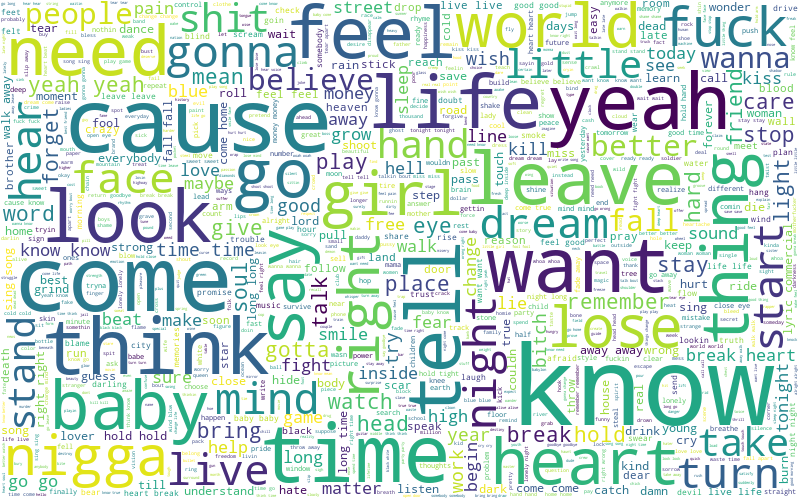

In [244]:
from wordcloud import WordCloud

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=500, max_font_size=110, background_color="white", max_words=3000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(' '.join(df.lyrics))

# Visualize the word cloud
wordcloud.to_image()

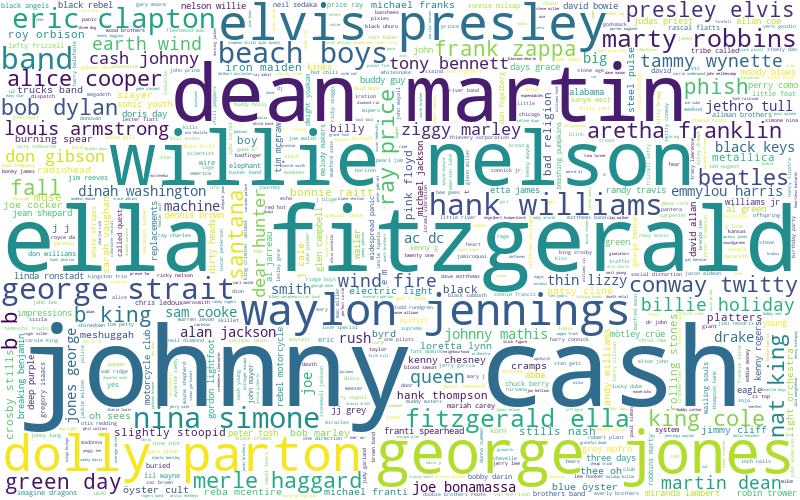

In [245]:
from wordcloud import WordCloud

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=500, max_font_size=110, background_color="white", max_words=3000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(' '.join(df.artist_name))

# Visualize the word cloud
wordcloud.to_image()

## Era dominated by Genre

<AxesSubplot:xlabel='genre', ylabel='release_date'>

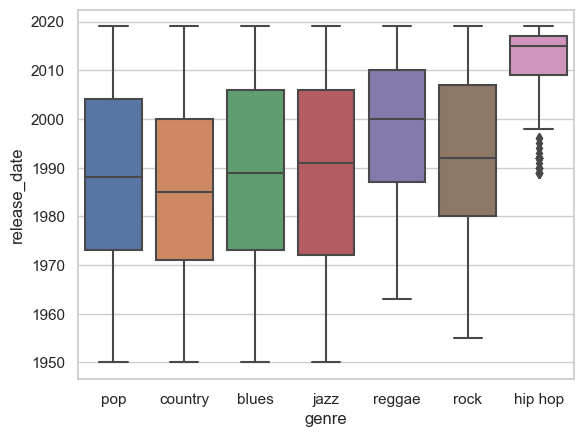

In [246]:
df = songs[songs.genre.isin(set(songs.genre))]

sns.boxplot(
    x='genre',
    y='release_date',
    data=df
)

In [131]:
df.columns

(Index(['Unnamed: 0', 'artist_name', 'track_name', 'release_date', 'genre',
        'lyrics', 'len', 'dating', 'violence', 'world/life', 'night/time',
        'shake the audience', 'family/gospel', 'romantic', 'communication',
        'obscene', 'music', 'movement/places', 'light/visual perceptions',
        'family/spiritual', 'like/girls', 'sadness', 'feelings', 'danceability',
        'loudness', 'acousticness', 'instrumentalness', 'valence', 'energy',
        'topic', 'age'],
       dtype='object'),
 {'blues', 'country', 'hip hop', 'jazz', 'pop', 'reggae', 'rock'})

In [10]:
df.head(3)

Unnamed: 0    artist_name            track_name  release_date genre  \
0           0         mukesh  mohabbat bhi jhoothi          1950   pop   
1           4  frankie laine             i believe          1950   pop   
2           6    johnnie ray                   cry          1950   pop   

                                              lyrics  len    dating  violence  \
0  hold time feel break feel untrue convince spea...   95  0.000598  0.063746   
1  believe drop rain fall grow believe darkest ni...   51  0.035537  0.096777   
2  sweetheart send letter goodbye secret feel bet...   24  0.002770  0.002770   

   world/life  ...   sadness  feelings  danceability  loudness  acousticness  \
0    0.000598  ...  0.380299  0.117175      0.357739  0.454119      0.997992   
1    0.443435  ...  0.001284  0.001284      0.331745  0.647540      0.954819   
2    0.002770  ...  0.002770  0.225422      0.456298  0.585288      0.840361   

   instrumentalness   valence    energy       topic  age  
0          0.901822  0.339448  0.137110     sadness  1.0  
1          0.000002  0.325021  0.263240  world/life  1.0  
2          0.000000  0.351814  0.139112       music  1.0  

[3 rows x 31 columns]

# Analysing components of Music with time

<AxesSubplot:xlabel='sadness', ylabel='Density'>

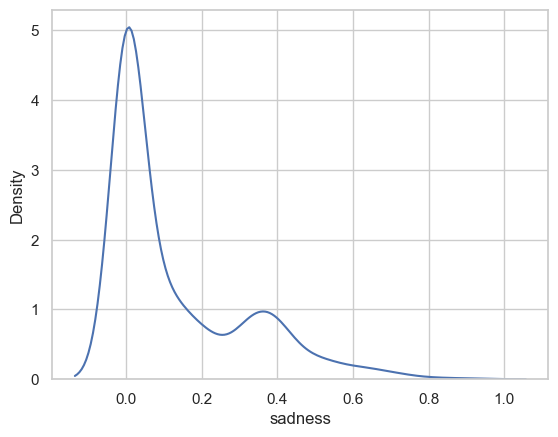

In [133]:
sns.kdeplot(songs['sadness'].sample(1000))

<AxesSubplot:xlabel='danceability', ylabel='release_date'>

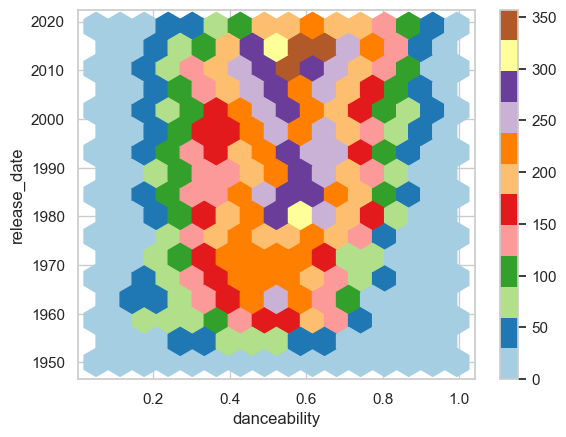

In [134]:
songs[songs['danceability'] > 0.05].plot.hexbin(x='danceability', y='release_date', gridsize=15,cmap='Paired')

<AxesSubplot:xlabel='loudness', ylabel='release_date'>

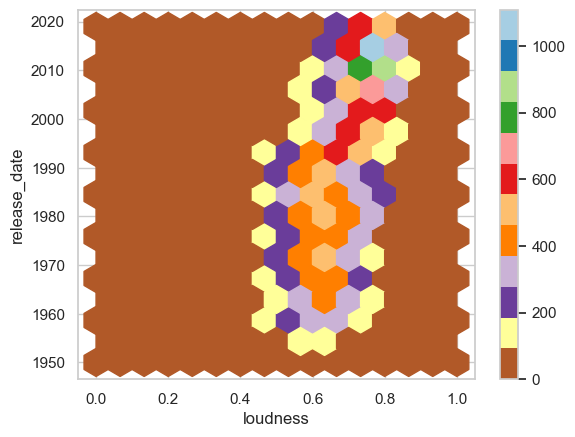

In [135]:
songs.plot.hexbin(x='loudness', y='release_date', gridsize=15,cmap='Paired_r')

<AxesSubplot:xlabel='acousticness', ylabel='release_date'>

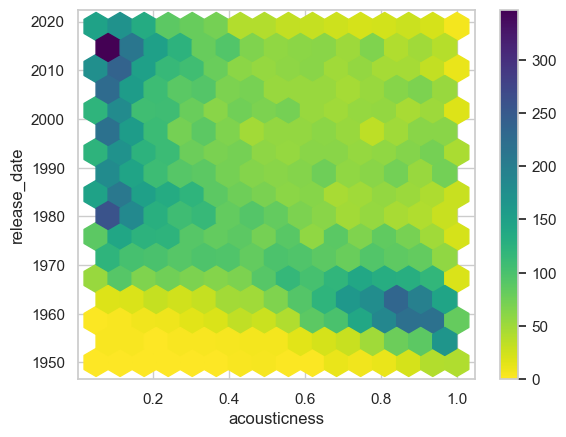

In [136]:
songs[songs['acousticness'] > 0.05].plot.hexbin(x='acousticness', y='release_date', gridsize=15,cmap='viridis_r')


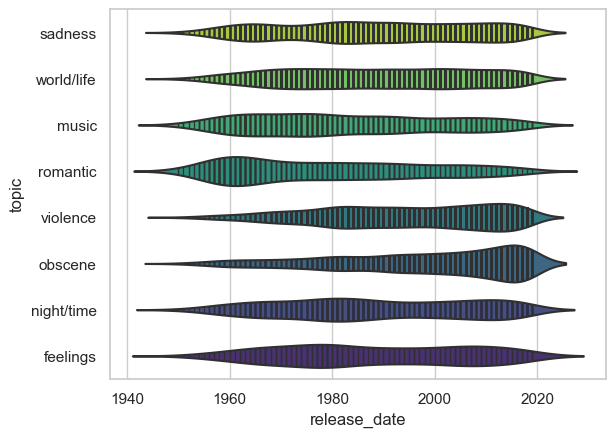

In [139]:
ax = sns.violinplot(
                    x='release_date',
                    y='topic',
                    data=songs[songs.topic.isin(songs.topic.value_counts().index)],
                    #scale="count",
                    palette="viridis_r",
                    inner='stick'
                   )

In [247]:
songs_cpy = songs[['artist_name', 'track_name', 'genre', 'lyrics', 'topic']]
songs_cpy.columns

Index(['artist_name', 'track_name', 'genre', 'lyrics', 'topic'], dtype='object')

In [248]:
df_t = df[df["release_date"]>2000]

In [250]:
int_df = df[[df.columns[1],df.columns[2],df.columns[3],df.columns[5],df.columns[-2]]]

In [251]:
int_df = df[df['artist_name'].isin(df_t.artist_name)]

In [252]:
df.shape

(28372, 31)

In [253]:
df.columns

Index(['Unnamed: 0', 'artist_name', 'track_name', 'release_date', 'genre',
       'lyrics', 'len', 'dating', 'violence', 'world/life', 'night/time',
       'shake the audience', 'family/gospel', 'romantic', 'communication',
       'obscene', 'music', 'movement/places', 'light/visual perceptions',
       'family/spiritual', 'like/girls', 'sadness', 'feelings', 'danceability',
       'loudness', 'acousticness', 'instrumentalness', 'valence', 'energy',
       'topic', 'age'],
      dtype='object')

In [254]:
int_df.shape

(17311, 31)

In [255]:
only_songs = int_df.lyrics

In [256]:
songs_length = [len(x.split(' ')) for x in only_songs]

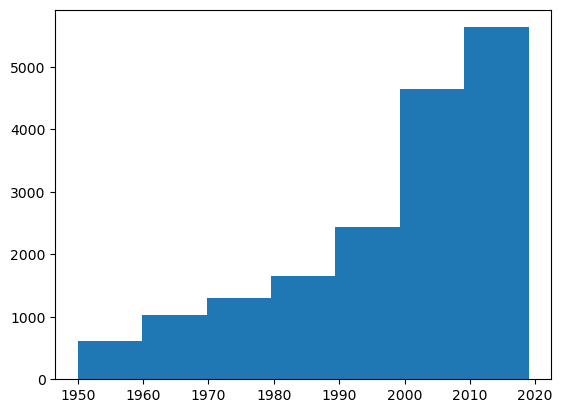

In [19]:
#songs_year = [x for x in int_df.release_date]

from matplotlib import pyplot as plt

plt.hist(list(int_df.release_date), 7)
plt.show()

In [20]:
len(int_df.artist_name.unique())

3258

In [21]:
sns.displot(songs_length)
plt.show()


In [22]:
int_df.columns

Index(['Unnamed: 0', 'artist_name', 'track_name', 'release_date', 'genre',
       'lyrics', 'len', 'dating', 'violence', 'world/life', 'night/time',
       'shake the audience', 'family/gospel', 'romantic', 'communication',
       'obscene', 'music', 'movement/places', 'light/visual perceptions',
       'family/spiritual', 'like/girls', 'sadness', 'feelings', 'danceability',
       'loudness', 'acousticness', 'instrumentalness', 'valence', 'energy',
       'topic', 'age'],
      dtype='object')

In [23]:
artist_info = int_df.groupby("artist_name") \
                .agg({'track_name': 'size'}) \
                .rename(columns={'track_name': "count"}) \
                .sort_values(['count'], ascending=False).reset_index()

In [24]:
artist_info

artist_name  count
0                   johnny cash    190
1               ella fitzgerald    188
2                   dean martin    146
3                 willie nelson    131
4                  george jones    107
...                         ...    ...
3253                kirko bangz      1
3254                  kingspade      1
3255  king khan and the shrines      1
3256               kina grannis      1
3257                  дэфолиант      1

[3258 rows x 2 columns]

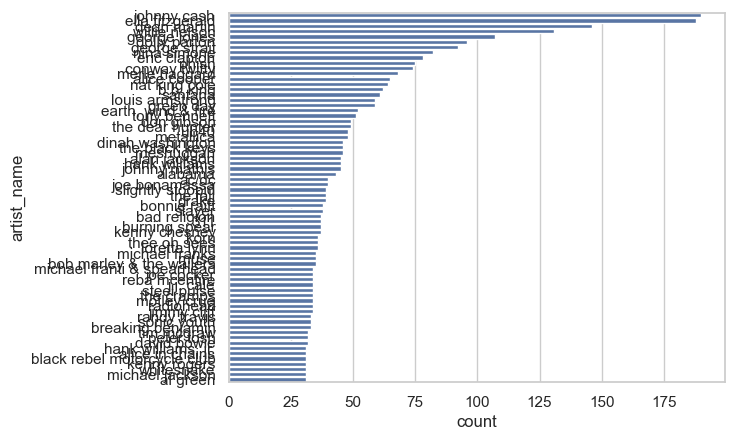

In [25]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
t = sns.barplot(x="count", y='artist_name', data=artist_info[0:70], color="b", orient='h')
plt.show(t)

In [26]:
artist_info.head(20);

In [27]:
artist_info.shape

(3258, 2)

In [28]:
artist_info[:20]

artist_name  count
0          johnny cash    190
1      ella fitzgerald    188
2          dean martin    146
3        willie nelson    131
4         george jones    107
5         dolly parton     96
6        george strait     92
7          nina simone     82
8         eric clapton     78
9                phish     75
10       conway twitty     74
11       merle haggard     68
12        alice cooper     65
13       nat king cole     64
14           b.b. king     62
15             santana     61
16     louis armstrong     59
17           green day     59
18  earth, wind & fire     52
19        tony bennett     51

In [29]:
artist_filtered = artist_info[artist_info["count"]>25]
artist_filtered.shape

(109, 2)

In [30]:
final_df = int_df[int_df['artist_name'].isin(artist_filtered.artist_name)] 
final_df.shape

(4764, 31)

In [31]:
final_df =  final_df[[df.columns[1],df.columns[2],df.columns[3],df.columns[5],df.columns[-2]]]


In [32]:
final_df.shape

(4764, 5)

In [33]:
final_df.head()

artist_name                                         track_name  \
5      perry como  round and round (with mitchell ayres and his o...   
7   johnny mathis                             it's not for me to say   
75  johnny mathis               love, your magic spell is everywhere   
88  johnny mathis                in other words (fly me to the moon)   
92  johnny mathis                         it might as well be spring   

    release_date                                             lyrics  \
5           1950  convoy light dead ahead merchantmen trump dies...   
7           1950  care moment hold fast press lips dream heaven ...   
75          1956  magic spell know fair leave laugh fate late co...   
88          1956  moon play star spring like jupiter mar word ho...   
92          1956  restless windstorm jumpy puppet string spring ...   

         topic  
5     violence  
7   world/life  
75     sadness  
88       music  
92       music

In [34]:
final_df.sort_values(by= "release_date",ascending =False)

artist_name                                         track_name  \
17065    deep purple                       black night (single version)   
23420           soja                                            morning   
12449  george strait                                    two more wishes   
17090   thee oh sees                                    the daily heavy   
17081        santana                                         blue skies   
...              ...                                                ...   
17099    dean martin  absence makes the heart grow fonder (for someb...   
17098    dean martin                                       just for fun   
17097    dean martin                                       three wishes   
17096    dean martin                                  be honest with me   
5         perry como  round and round (with mitchell ayres and his o...   

       release_date                                             lyrics  \
17065          2019  black night right feel bright care tight maybe...   
23420          2019  remove ears check blade redrum check chop chec...   
12449          2019  genie bottle cause hopin real hard appear temp...   
17090          2019  stop baby tear asunder shove go live stuff plu...   
17081          2019  lose feet grind color burn loneliness ocean aw...   
...             ...                                                ...   
17099          1950  leave know grieve remember absence make heart ...   
17098          1950  softly sigh close maybe agree hand magic land ...   
17097          1950  wish simple wish wish wish days gladness sweet...   
17096          1950  honest dear remember dear true wander land hon...   
5              1950  convoy light dead ahead merchantmen trump dies...   

            topic  
17065  night/time  
23420     obscene  
12449     obscene  
17090  world/life  
17081       music  
...           ...  
17099     sadness  
17098     sadness  
17097     sadness  
17096    romantic  
5        violence  

[4764 rows x 5 columns]

In [35]:
cleared_df = pd.DataFrame()
for i in artist_filtered.artist_name[:]:
    cleared_df = cleared_df.append(final_df[final_df.artist_name == i][:25])
    cleared_df.head()


In [36]:
cleared_df.shape

(2725, 5)

In [37]:
25 * len(artist_filtered.artist_name) , len(artist_filtered.artist_name) ,

(2725, 109)

In [38]:
cleared_df = cleared_df.sort_values(by="release_date",ascending= False).reset_index(drop=True)

<AxesSubplot:>

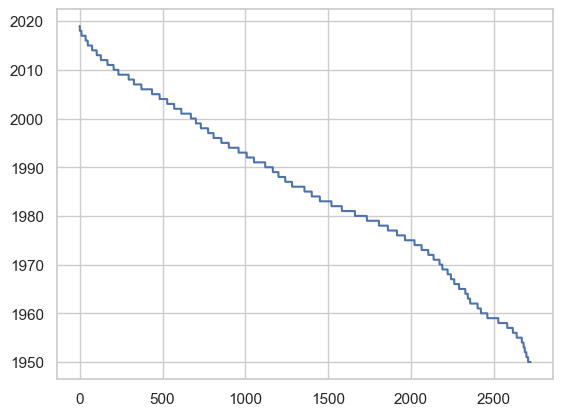

In [104]:
cleared_df['release_date'].plot.line()

In [39]:
artists = cleared_df.artist_name
artists.shape

(2725,)

In [40]:
cleared_df.lyrics[0]


'flame beacon dark rain lighthouse stand pain know safe lighthouse ohohoh ohohoh lighthouse ohohoh ohohoh ohohoh ohohoh lighthouse ohohoh ohohoh proud lose wave lighthouse strength know safe lighthouse ohohoh ohohoh lighthouse ohohoh ohohoh ohohoh ohohoh lighthouse ohohoh ohohoh captivate mother arm hand wait fall captivate mother arm hand wait fall flame beacon dark rain lighthouse stand pain know safe lighthouse ohohoh ohohoh lighthouse ohohoh ohohoh ohohoh ohohoh lighthouse ohohoh ohohoh proud lose wave lighthouse strength know safe lighthouse'

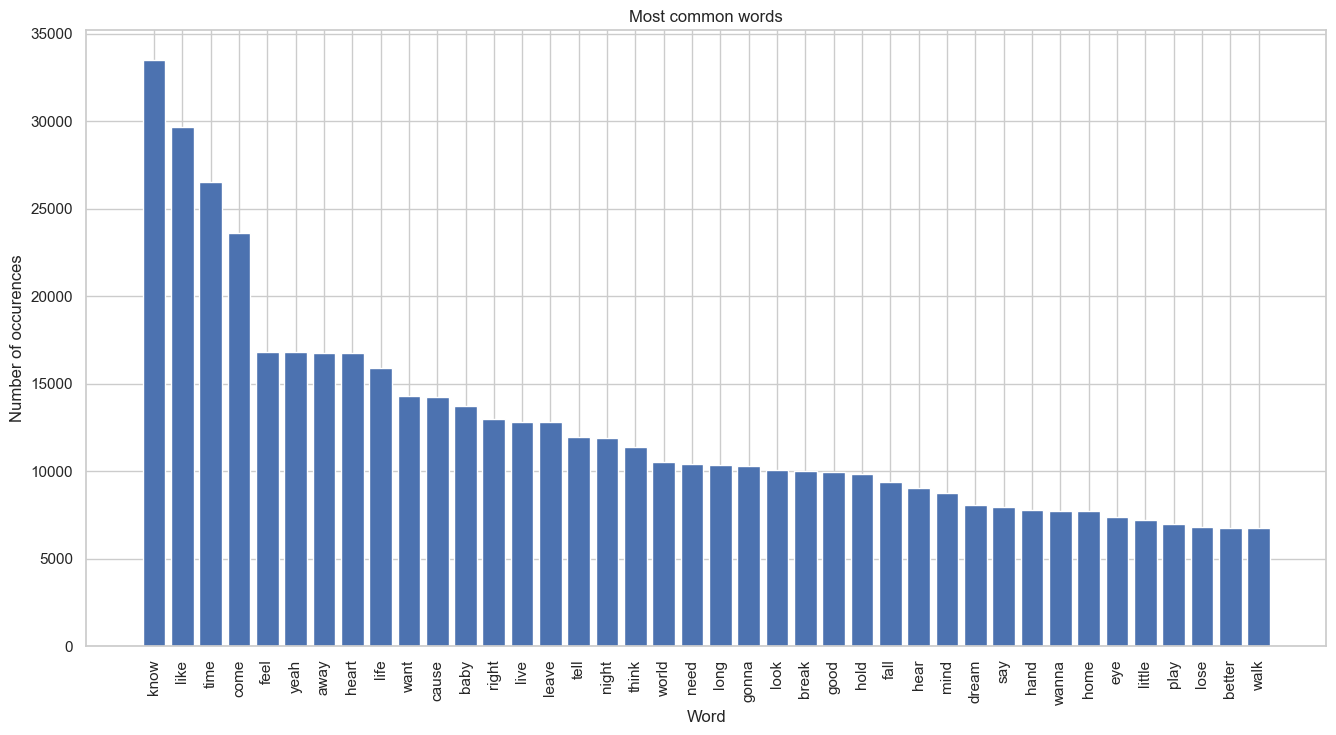

In [177]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

def get_top_n_words(corpus, n=10):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

words = []
word_values = []
for i,j in get_top_n_words(songs_cpy.lyrics, 40):
    words.append(i)
    word_values.append(j)
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title("Most common words");
ax.set_xlabel('Word');
ax.set_ylabel('Number of occurences');
plt.show()

## Bag of Words

In [41]:
import spacy

from scipy import spatial
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [42]:
vectorizer = CountVectorizer()
bow = vectorizer.fit_transform(cleared_df.lyrics)


In [43]:
print(len(vectorizer.get_feature_names_out()))

vectorizer.vocabulary_

12245


{'flame': 3917,
 'beacon': 855,
 'dark': 2590,
 'rain': 8436,
 'lighthouse': 6042,
 'stand': 10150,
 'pain': 7528,
 'know': 5819,
 'safe': 9090,
 'ohohoh': 7293,
 'proud': 8257,
 'lose': 6178,
 'wave': 11785,
 'strength': 10299,
 'captivate': 1570,
 'mother': 6820,
 'arm': 488,
 'hand': 4705,
 'wait': 11710,
 'fall': 3710,
 'hold': 5007,
 'line': 6074,
 'give': 4362,
 'tell': 10707,
 'house': 5124,
 'come': 2038,
 'consequence': 2184,
 'cost': 2317,
 'star': 10160,
 'align': 262,
 'heaven': 4854,
 'step': 10213,
 'save': 9166,
 'cause': 1649,
 'strong': 10330,
 'leave': 5951,
 'heart': 4835,
 'cast': 1624,
 'away': 644,
 'product': 8188,
 'today': 10929,
 'prey': 8140,
 'edge': 3313,
 'face': 3668,
 'natural': 6975,
 'beat': 870,
 'stone': 10250,
 'gotta': 4473,
 'cold': 2000,
 'world': 12053,
 'yeah': 12130,
 'live': 6100,
 'life': 6023,
 'cutthroat': 2534,
 'lyric': 6257,
 'commercial': 2056,
 'shit': 9508,
 'menacin': 6536,
 'frightenin': 4141,
 'help': 4890,
 'scare': 9195,
 'tweak

In [45]:
print(bow)

  (0, 3917)	2
  (0, 855)	2
  (0, 2590)	2
  (0, 8436)	2
  (0, 6042)	14
  (0, 10150)	2
  (0, 7528)	2
  (0, 5819)	4
  (0, 9090)	4
  (0, 7293)	24
  (0, 8257)	2
  (0, 6178)	2
  (0, 11785)	2
  (0, 10299)	2
  (0, 1570)	2
  (0, 6820)	2
  (0, 488)	2
  (0, 4705)	2
  (0, 11710)	2
  (0, 3710)	2
  (1, 10150)	2
  (1, 5007)	1
  (1, 6074)	1
  (1, 4362)	2
  (1, 10707)	2
  :	:
  (2723, 10890)	1
  (2723, 6098)	3
  (2723, 4847)	1
  (2723, 5026)	2
  (2723, 6148)	2
  (2723, 1583)	2
  (2723, 2633)	1
  (2723, 7869)	1
  (2723, 3424)	1
  (2723, 9503)	2
  (2723, 9940)	12
  (2723, 3686)	2
  (2723, 9095)	2
  (2723, 11189)	3
  (2723, 4735)	1
  (2723, 1316)	1
  (2723, 1084)	1
  (2723, 1924)	1
  (2723, 2323)	1
  (2723, 3762)	1
  (2724, 11710)	2
  (2724, 2038)	1
  (2724, 6153)	2
  (2724, 12148)	1
  (2724, 11614)	7


In [44]:
print(type(bow))

<class 'scipy.sparse.csr.csr_matrix'>


In [46]:
#bow[0].toarray()print(cosine_similarity(bow))

In [47]:
cs = cosine_similarity(bow)

In [48]:
cs.shape

(2725, 2725)

In [49]:
def top_k(arr, k):
  kth_largest = (k + 1) * -1
  return np.argsort(arr)[:kth_largest:-1]

In [50]:
cs

array([[1.        , 0.01600051, 0.02073136, ..., 0.03572088, 0.01376161,
        0.0176756 ],
       [0.01600051, 1.        , 0.04198925, ..., 0.02255034, 0.05574549,
        0.01534291],
       [0.02073136, 0.04198925, 1.        , ..., 0.05113108, 0.01375765,
        0.00662644],
       ...,
       [0.03572088, 0.02255034, 0.05113108, ..., 1.        , 0.00323249,
        0.        ],
       [0.01376161, 0.05574549, 0.01375765, ..., 0.00323249, 1.        ,
        0.04398676],
       [0.0176756 , 0.01534291, 0.00662644, ..., 0.        , 0.04398676,
        1.        ]])

In [51]:
artists[2724], artists[0]

('dean martin', 'dirty heads')

In [52]:
import numpy as np
count =0
for i in range(len(artists)):

    # print(i,y[0])
    cs[i][i]=0
    t = top_k(cs[i], 10)
    #print(artists[i],'<>', artists[t[0]])
    if artists[i] in [artists[t[0]],artists[t[1]],artists[t[2]],artists[t[3]],artists[t[4]],artists[t[5]],artists[t[6]],artists[t[7]],artists[t[8]],artists[t[9]]]:
        count +=1
count

581

In [53]:
import numpy as np
count =0
for i in range(len(artists)):

    # print(i,y[0])
    cs[i][i]=0
    t = top_k(cs[i], 10)
    #print(artists[i],'<>', artists[t[0]])
    if artists[i] in [artists[t[0]],artists[t[1]],artists[t[2]],artists[t[3]],artists[t[4]]]:
        count +=1
count

369

In [54]:
import numpy as np
count =0
for i in range(len(artists)):

    # print(i,y[0])
    cs[i][i]=0
    t = top_k(cs[i], 10)
    #print(artists[i],'<>', artists[t[0]])
    if artists[i] in [artists[t[0]]]:
        count +=1
count

125

In [55]:
count/len(artists)

0.045871559633027525

In [56]:
1/109

0.009174311926605505

## TF-IDF : 
Term frequency and Inverse Document Frequency 

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [59]:
vectorizer = TfidfVectorizer()
features = vectorizer.fit_transform(cleared_df.lyrics)

In [60]:
len(vectorizer.get_feature_names_out())

12245

In [61]:
print(features.shape)

(2725, 12245)


In [62]:
print(features[0]);

  (0, 3710)	0.02756155986496456
  (0, 11710)	0.03347590420610666
  (0, 4705)	0.02702142078557103
  (0, 488)	0.03651502172297166
  (0, 6820)	0.04192750954031006
  (0, 1570)	0.06960133776539922
  (0, 10299)	0.05071070949917334
  (0, 11785)	0.04823713117202623
  (0, 6178)	0.027830751524510516
  (0, 8257)	0.04823713117202623
  (0, 7293)	0.8352160531847906
  (0, 9090)	0.09396036413230055
  (0, 5819)	0.032619064161776755
  (0, 7528)	0.03101638252058135
  (0, 10150)	0.02893497554649894
  (0, 6042)	0.5124969918201173
  (0, 8436)	0.035619872884911905
  (0, 2590)	0.0371142098893554
  (0, 855)	0.06960133776539922
  (0, 3917)	0.04508635183434669


In [63]:
#query_tfidf = vectorizer.transform(cleared_df.lyrics)

In [64]:
cs_tfidf = cosine_similarity(features)

In [65]:
count =0
for i in range(len(artists)):

    # print(i,y[0])
    cs_tfidf[i][i]=0
    t = top_k(cs_tfidf[i], 10)
    #print(artists[i],'<>', artists[t[0]])
    if artists[i] in [artists[t[0]],artists[t[1]],artists[t[2]],artists[t[3]],artists[t[4]],artists[t[5]],artists[t[6]],artists[t[7]],artists[t[8]],artists[t[9]]]:
        count +=1
count

622

In [66]:
count/len(artists)

0.22825688073394496

In [67]:
count =0
for i in range(len(artists)):

    # print(i,y[0])
    cs_tfidf[i][i]=0
    t = top_k(cs_tfidf[i], 10)
    #print(artists[i],'<>', artists[t[0]])
    if artists[i] in [artists[t[0]],artists[t[1]],artists[t[2]],artists[t[3]],artists[t[4]]]:
        count +=1
count

394

In [68]:
count =0
for i in range(len(artists)):

    # print(i,y[0])
    cs_tfidf[i][i]=0
    t = top_k(cs_tfidf[i], 10)
    #print(artists[i],'<>', artists[t[0]])
    if artists[i] in [artists[t[0]]]:
        count +=1
    #else:
        #print(i,t[0])
count

142

## Naive Bayes

In [70]:
target = cleared_df.artist_name
lyrics = cleared_df.lyrics
lyrics.shape

(2725,)

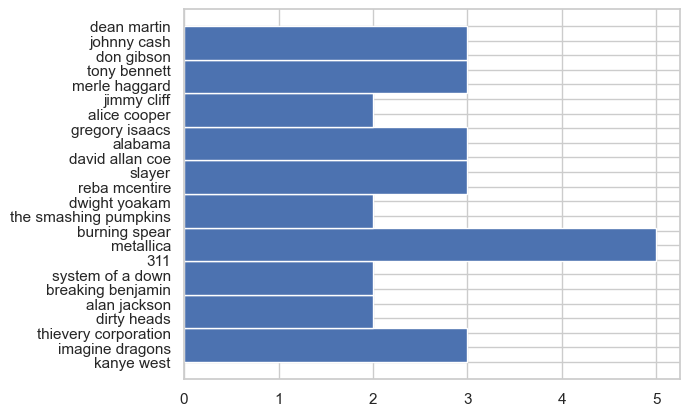

In [71]:
tr = plt.hist(target[2::100], orientation = 'horizontal')


In [72]:
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import train_test_split


train_data, val_data, train_labels, val_labels = train_test_split(lyrics, target, train_size=0.9, random_state=1) 
nb_classifer = MultinomialNB()
nlp = spacy.blank('en')
vectorizer = TfidfVectorizer()
train_feature_vects = vectorizer.fit_transform(train_data)
nb_classifer.fit(train_feature_vects,train_labels)
nb_classifer.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}

In [73]:
train_preds = nb_classifer.predict(train_feature_vects)

In [74]:

from sklearn import metrics
from sklearn import model_selection

print('F1 score on initial training set: {}'.format(metrics.f1_score(train_labels, train_preds, average='macro')))

F1 score on initial training set: 0.923939415760794


In [75]:
val_preds = nb_classifer.predict(vectorizer.transform(val_data))
metrics.f1_score(val_labels, val_preds, average='macro')

0.09694189602446485

In [76]:
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import train_test_split


train_data, val_data, train_labels, val_labels = train_test_split(lyrics, target, train_size=0.9, random_state=1) 

nlp = spacy.blank('en')
vectorizer = TfidfVectorizer(max_df=0.9,min_df=0.005)
train_feature_vects = vectorizer.fit_transform(train_data)
nb_classifer = MultinomialNB()
nb_classifer.fit(train_feature_vects,train_labels)
nb_classifer.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}

In [77]:
train_preds = nb_classifer.predict(train_feature_vects)
print('F1 score on initial training set: {}'.format(metrics.f1_score(train_labels, train_preds, average='macro')))

F1 score on initial training set: 0.8423186100680803


In [78]:
val_preds = nb_classifer.predict(vectorizer.transform(val_data))
metrics.f1_score(val_labels, val_preds, average='macro')

0.10579252551729616

In [79]:
#print(metrics.classification_report(val_labels, val_preds, target_names =list(train_labels.unique()) ))

## 

## Bert Model
talk bout the bert 

In [80]:
# bert_embeddings = bmodel.encode(train_data)
bmodel = SentenceTransformer("all-MiniLM-L6-v2")

In [81]:
from tqdm import tqdm
embeds = [bmodel.encode(i) for i in tqdm(train_data)]

100%|███████████████████████████████████████| 2452/2452 [02:08<00:00, 19.11it/s]


In [82]:
len(embeds),len(train_labels)

(2452, 2452)

In [83]:

cs = cosine_similarity(embeds)

count =0
final_artists = list(train_labels)
for i in range(len(train_labels)):

    # print(i,y[0])
    cs[i][i]=0
    t = top_k(cs[i], 10)
    #print(artists[i],'<>', artists[t[0]])
    if final_artists[i] in [final_artists[t[0]],final_artists[t[1]],final_artists[t[2]],final_artists[t[3]],final_artists[t[4]],final_artists[t[5]],final_artists[t[6]],final_artists[t[7]],final_artists[t[8]],final_artists[t[9]]]:
        count +=1
count/len(final_artists)

0.29526916802610115

In [84]:
count

724

In [85]:
set(train_labels)

{'311',
 'a tribe called quest',
 'ac/dc',
 'al green',
 'al jarreau',
 'alabama',
 'alan jackson',
 'alice cooper',
 'alice in chains',
 'b.b. king',
 'bad religion',
 'between the buried and me',
 'black rebel motorcycle club',
 'bob marley & the wailers',
 'bobby darin',
 'bonnie raitt',
 'breaking benjamin',
 'buddy guy',
 'burning spear',
 'chris ledoux',
 'chuck berry',
 'conway twitty',
 'dan fogelberg',
 'david allan coe',
 'david bowie',
 'dean martin',
 'deep purple',
 'dennis brown',
 'dinah washington',
 'dirty heads',
 'dolly parton',
 'don gibson',
 'drake',
 'dwight yoakam',
 'earth, wind & fire',
 'ella fitzgerald',
 'eric clapton',
 'etta james',
 'george jones',
 'george strait',
 'green day',
 'gregory isaacs',
 'hank williams',
 'hank williams, jr.',
 'imagine dragons',
 'j.j. cale',
 'jimmy cliff',
 'jj grey & mofro',
 'joe bonamassa',
 'joe cocker',
 'john mayer',
 'johnny cash',
 'johnny mathis',
 'journey',
 'kanye west',
 'kenny chesney',
 'kenny g',
 'kenny ro

## Implement Random forest

In [95]:
from sklearn.ensemble import RandomForestClassifier

In [96]:
clf = RandomForestClassifier()
clf.fit(embeds,train_labels)

RandomForestClassifier()

In [98]:
from sklearn.metrics import f1_score, recall_score, accuracy_score,precision_score,classification_report,confusion_matrix


res = clf.predict(embeds)
accuracy_score(train_labels, res)

1.0

In [100]:
embeds_test = [bmodel.encode(i) for i in tqdm(val_data)]
res = clf.predict(embeds_test)

accuracy_score(val_labels, res)

100%|█████████████████████████████████████████| 273/273 [00:14<00:00, 18.49it/s]


0.0989010989010989

## Recommendation

In [129]:
songs_cpy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28372 entries, 0 to 28371
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   artist_name  28372 non-null  object
 1   track_name   28372 non-null  object
 2   genre        28372 non-null  object
 3   lyrics       28372 non-null  object
 4   topic        28372 non-null  object
dtypes: object(5)
memory usage: 1.1+ MB


In [140]:
songs_cpy['tags'] =   songs_cpy['topic']+" "+songs_cpy['genre'] + " "+songs_cpy['lyrics'] +" "+ songs_cpy['artist_name']

/Users/soeb/opt/anaconda3/envs/NLP/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [141]:
new = songs_cpy.drop(columns=['topic','genre','lyrics','artist_name'])

In [143]:
songs_cpy['tags'].head(3)

0    sadness pop hold time feel break feel untrue c...
1    world/life pop believe drop rain fall grow bel...
2    music pop sweetheart send letter goodbye secre...
Name: tags, dtype: object

In [148]:
t = []
for i in tqdm(songs_cpy['tags']):
    t.append(bmodel.encode(i))

100%|█████████████████████████████████████| 28372/28372 [29:35<00:00, 15.98it/s]


In [149]:
similarity = cosine_similarity(t,t)

In [151]:
indices = pd.Series(songs_cpy.index,index=songs_cpy['track_name']).drop_duplicates()
print(len(indices))
len(indices.unique())

28372


28372

In [163]:
def music_recommender(title):
    movie_index = indices[title]
    sim_list = list(enumerate(similarity[movie_index]))
    sim_list = pd.DataFrame(sim_list)
    sim_sorted = sim_list.sort_values(by = 1,ascending=False)
    sim_sorted = sim_sorted[:11]
    music_indices = list(sim_sorted[0])
    return songs_cpy['track_name'].iloc[music_indices]



In [167]:
music_recommender('patricia')

3                                                 patricia
23513                                             my heart
481                                         you're sixteen
777                                      your kiss of fire
6401                                   like real people do
4086               the shoop shoop song (it's in his kiss)
3837               the shoop shoop song (it's in his kiss)
338                                          sweet leilani
1817     you're sixteen (you’re beautiful and you’re mine)
502                                   my one and only love
23344                                              kiss me
Name: track_name, dtype: object

In [156]:
df[df["track_name"]=="you're sixteen"]

Unnamed: 0      artist_name      track_name  release_date genre  \
481        1255  johnny burnette  you're sixteen          1961   pop   

                                                lyrics  len    dating  \
481  come like dream peach cream lips like strawber...   48  0.083195   

     violence  world/life  ...   sadness  feelings  danceability  loudness  \
481  0.001422    0.001422  ...  0.094226  0.053152      0.403228  0.687024   

     acousticness  instrumentalness   valence    energy     topic       age  
481      0.800201               0.0  0.747527  0.458442  romantic  0.842857  

[1 rows x 31 columns]

In [158]:
df[df["track_name"]=="sweet leilani"]

Unnamed: 0  artist_name     track_name  release_date genre  \
338           873    sam cooke  sweet leilani          1960   pop   
17376       54937  bing crosby  sweet leilani          1956  jazz   

                                                  lyrics  len    dating  \
338    sweet leilani heavenly nature fashion roses ki...   35  0.176431   
17376  sweet leilani heavenly nature fashion roses ki...   48  0.098251   

       violence  world/life  ...   sadness  feelings  danceability  loudness  \
338    0.002924    0.002924  ...  0.002924  0.002924      0.292754  0.634772   
17376  0.002193    0.002193  ...  0.002193  0.002193      0.231019  0.488142   

       acousticness  instrumentalness   valence    energy     topic       age  
338        0.800201          0.000021  0.355936  0.394375  romantic  0.857143  
17376      0.995984          0.069332  0.238458  0.122095  romantic  0.914286  

[2 rows x 31 columns]

In [157]:
df[df["track_name"]=="your kiss of fire"]

Unnamed: 0   artist_name         track_name  release_date genre  \
777        2072  the supremes  your kiss of fire          1964   pop   

                                                lyrics  len    dating  \
777  lalalala lalalala give sweet kiss burn flame s...   87  0.000693   

     violence  world/life  ...   sadness  feelings  danceability  loudness  \
777  0.024183    0.000693  ...  0.070387  0.000693       0.68266  0.698946   

     acousticness  instrumentalness   valence    energy     topic  age  
777      0.772088          0.000241  0.805235  0.433416  romantic  0.8  

[1 rows x 31 columns]

In [171]:
music_recommender("make me better")

5595         make me better
6060        pumped up kicks
24530    you better you bet
6394            comfortable
6692               everyday
6507           get you good
6839          heebiejeebies
7392          childish love
4520         i can love you
6861                icy grl
6411             wet dreamz
Name: track_name, dtype: object

## Gensim

In [188]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

import spacy
from spacy.lang.en.stop_words import STOP_WORDS

stop_words = list(STOP_WORDS)

In [189]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

hp_words = list(sent_to_words(df.lyrics))

In [190]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [220]:
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

kmeans = KMeans(n_clusters=10, random_state = 420)
kmeans.fit(t)
clusters = kmeans.labels_

In [221]:
pca = PCA(n_components=2, random_state=420)
# pass X to the pca
pca_vecs = pca.fit_transform(t)
# save the two dimensions in x0 and x1
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

In [222]:
cluster_map = {0: "6", 1: "5", 2: "4",3: "3", 4: "2", 5: "1", 6: "40",7: "30", 8: "20", 9: "10"}
# apply mapping
df['cluster'] = clusters
df['x0'] = x0
df['x1'] = x1
df['cluster'] = df['cluster'].map(cluster_map)

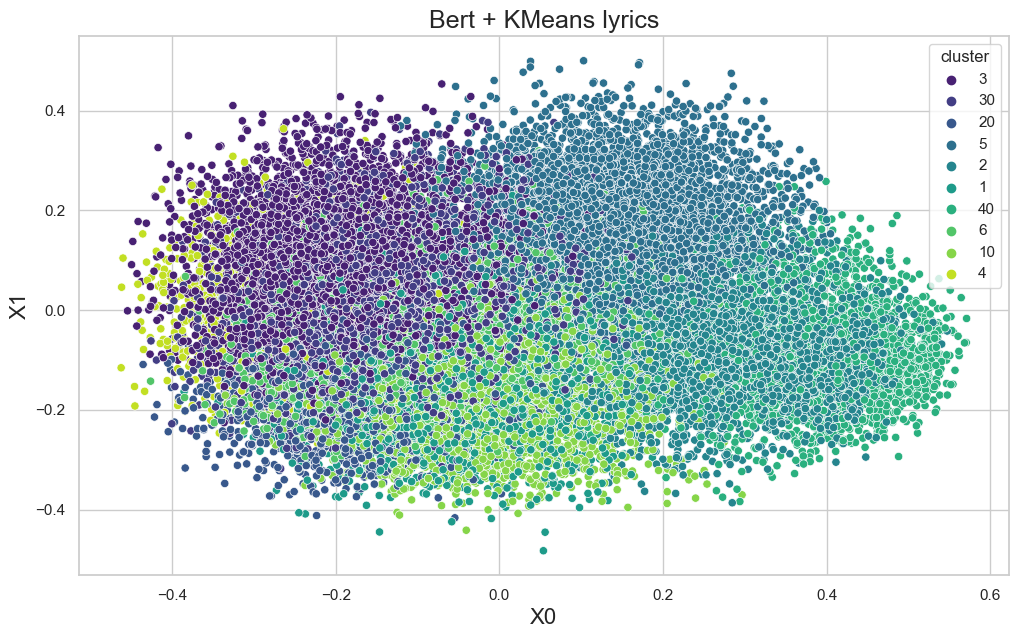

In [223]:
plt.figure(figsize=(12, 7))
# set a title
plt.title("Bert + KMeans lyrics", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
# create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=df,x='x0',y='x1', hue='cluster', palette="viridis")
plt.show()

In [224]:
from nltk.tokenize import RegexpTokenizer

lyric_corpus_tokenized = []
tokenizer = RegexpTokenizer(r'\w+')
for lyric in tqdm(df.lyrics):
    tokenized_lyric = tokenizer.tokenize(lyric.lower())  #tokenize and lower each lyric
    lyric_corpus_tokenized.append(tokenized_lyric)

from nltk.corpus import stopwords

stop_words = stopwords.words('english')
new_stop_words = ['ooh','yeah','hey','whoa','woah', 'ohh', 'was', 'mmm', 'oooh','yah','yeh','mmm', 'hmm','deh','doh','jah','wa']
stop_words.extend(new_stop_words)

for s,song in tqdm(enumerate(lyric_corpus_tokenized)):
    filtered_text = []    
    for token in song:
        if token not in stop_words:
            filtered_text.append(token)
    lyric_corpus_tokenized[s] = filtered_text

100%|██████████████████████████████████| 28372/28372 [00:01<00:00, 27939.00it/s]
28372it [00:04, 6324.62it/s]


In [225]:
for s,song in tqdm(enumerate(lyric_corpus_tokenized)):
    filtered_song = []    
    for token in song:
        if len(token) > 2 and not token.isnumeric():
            filtered_song.append(token)
    lyric_corpus_tokenized[s] = filtered_song

28372it [00:00, 63232.54it/s]


In [226]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
new_stop_words = ['ooh','yeah','hey','whoa','woah', 'ohh', 'was', 'mmm', 'oooh','yah','yeh','mmm', 'hmm','deh','doh','jah','wa']
stop_words.extend(new_stop_words)

for s,song in tqdm(enumerate(lyric_corpus_tokenized)):
    filtered_text = []    
    for token in song:
        if token not in stop_words:
            filtered_text.append(token)
    lyric_corpus_tokenized[s] = filtered_text

28372it [00:04, 6309.84it/s]


In [228]:
from gensim.corpora import Dictionary

dictionary = Dictionary(lyric_corpus_tokenized)
print('Number of unique tokens: ', len(dictionary))

Number of unique tokens:  51664


In [229]:
# In order to further reduce dimensionality, tokens that occur less than 100 songs, as well as tokens that occur in more than 80% of songs are removed
dictionary.filter_extremes(no_below = 100, no_above = 0.8)
print('Number of unique tokens: ', len(dictionary))

Number of unique tokens:  1570


In [230]:
from gensim.corpora import MmCorpus

gensim_corpus = [dictionary.doc2bow(song) for song in lyric_corpus_tokenized]

#create index to dictionary
temp = dictionary[0]  # "loads" the dictionary
id2word = dictionary.id2token

In [231]:
chunksize = 2000
passes = 20
iterations = 400
num_topics = 10

In [232]:
from gensim.models import LdaModel
lda_model = LdaModel(corpus=gensim_corpus,
                    id2word=id2word,
                    chunksize=chunksize,
                    alpha='auto',
                    eta='auto',
                    iterations=iterations,
                    num_topics=num_topics,
                    passes=passes
                    )

In [233]:
from pprint import pprint

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[gensim_corpus]

[(0,
  '0.055*"hold" + 0.035*"dream" + 0.027*"remember" + 0.025*"blue" + '
  '0.023*"come" + 0.023*"sweet" + 0.022*"days" + 0.022*"kiss" + 0.020*"lonely" '
  '+ 0.020*"true"'),
 (1,
  '0.066*"hand" + 0.061*"head" + 0.056*"stand" + 0.050*"black" + 0.033*"dead" '
  '+ 0.022*"wall" + 0.018*"come" + 0.017*"white" + 0.017*"line" + '
  '0.016*"high"'),
 (2,
  '0.042*"fuck" + 0.034*"shit" + 0.032*"nigga" + 0.031*"bitch" + 0.027*"know" '
  '+ 0.025*"like" + 0.024*"money" + 0.023*"niggas" + 0.023*"lyric" + '
  '0.022*"commercial"'),
 (3,
  '0.025*"fight" + 0.019*"kill" + 0.016*"burn" + 0.015*"come" + 0.014*"blood" '
  '+ 0.014*"cold" + 0.013*"hell" + 0.012*"soul" + 0.011*"fear" + '
  '0.010*"grind"'),
 (4,
  '0.094*"time" + 0.047*"heart" + 0.038*"know" + 0.036*"break" + 0.032*"mind" '
  '+ 0.031*"fall" + 0.027*"think" + 0.022*"leave" + 0.020*"lose" + '
  '0.018*"take"'),
 (5,
  '0.174*"like" + 0.021*"bout" + 0.020*"beat" + 0.019*"drink" + 0.016*"get" + '
  '0.016*"everybody" + 0.015*"talk" + 0.

In [234]:
from gensim.models import CoherenceModel

# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(gensim_corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=lyric_corpus_tokenized, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.211176506528445
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | fa

In [236]:
topics = lda_model.show_topics(formatted=False)

In [238]:
from collections import Counter
data_flat = [w for w_list in lyric_corpus_tokenized for w in w_list]
counter = Counter(data_flat)

In [239]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(5,2, figsize=(10,15), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.2); ax.set_ylim(0, 10000)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

/Users/soeb/opt/anaconda3/envs/NLP/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/soeb/opt/anaconda3/envs/NLP/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/soeb/opt/anaconda3/envs/NLP/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/soeb/opt/anaconda3/envs/NLP/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/soeb/opt/anaconda3/envs/NLP/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/soeb/opt/anaconda3/envs/NLP/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/soeb/opt/